# Champ Electrique et Transformée de Fourier

$$
\newcommand{\reE}{\mathcal{E}}  %Champ réel associé à E
\newcommand{\ccon}{^{\ast}} %Complexe conjugué dc E\ccon c'est le complexe conjugué de E
\newcommand{\conv}{{\otimes}} %Convolution
\newcommand{\eps}{\varepsilon}
\newcommand{\om}{{\omega}}
\newcommand{\omz}{{\omega_{0}}}
$$
Le champ électrique  est une quantité réelle, que nous noterons $\reE(t)$ et que nous décomposerons comme:
$$
\reE(t) = \frac{1}{2} \left[ E(t) + E\ccon(t)\right]=\Re[E(t)]
$$
$E(t)$ est le champ complexe correspondant à sa partie de fréquence positive, il se met sous la forme:
$$
E(t) = A(t)e^{-i\varphi(t)}%
\label{an:eq:def-Et}
$$
avec $\varphi(t)=\omz t+\varphi_f(t)$ où $\om_0$ est la pulsation centrale du champ électrique, $A(t)$ son enveloppe et $\varphi(t)$ sa phase temporelle, $\varphi_f(t)$ étant une phase temporelle supplémentaire due, par exemple, à de la dispersion ou à un façonnage.

## Unités

Les unités en physique sont celles du SI, mais il est plus judicieux de travailler, dans le dommaine des impulsions femtsecondes, avec des dérivées de celles-ci . Presque par définition, l'unité de temps est la *fs* et dans le domaine visible l'unité de longueur est le *nanomètre*. Une autre grandeur souvent utilisée est la pulsation $\omz$ lié à la fréquence par: $\omz=2\pi f$ qui s'exprimera donc en *rad/fs*. La constance *c* de la vitesse de la lumière s'exprime alors très simplement dans ces unités et vaut 300 *nm/fs*. Quand à une impulsion laser centrée à 800nm, elle a une pulsation $\omz=\frac{2\pi c}{\lambda_0}$ égale à:

In [1]:
from numpy import pi
c = 300  #nm/fs
lambda0 = 800  #nm
omega0 = 2*pi*c/lambda0
print(omega0)

2.356194490192345


Dans toute la suite de ces cours, le domaine fréquentiel sera donc exprimé en unité de pulsation *rad/fs* et le domaine temporel en *fs*

## Fonctions Utiles

In [13]:
import numpy as np
def ftAxis(Npts, omega_max):
    """
    Given two numbers Npts,omega_max, return two vectors spanning the temporal
    and spectral range. They are related by Fourier Transform

    Parameters
    ----------
    Npts: (int)
      A number of points defining the length of both grids
    omega_max: (float)
      The maximum circular frequency in the spectral domain. its unit defines
      the temporal units. ex: omega_max in rad/fs implies time_grid in fs

    Returns
    -------
    omega_grid: (ndarray)
      The spectral axis of the FFT
    time_grid: (ndarray))
      The temporal axis of the FFT
    See Also
    --------
    ftAxis, ftAxis_time, ift, ft2, ift2
    """
    if not isinstance(Npts, int):
        raise TypeError('n should be a positive integer, if possible power of 2')
    elif Npts < 1:
        raise ValueError('n should be a strictly positive integer')
    dT = 2 * np.pi / (2 * omega_max)
    omega_grid = np.linspace(-omega_max, omega_max, Npts)
    time_grid = dT * np.linspace(-(Npts - 1) / 2, (Npts - 1) / 2, Npts)
    return omega_grid, time_grid


def ftAxis_time(Npts, time_max):
    """
    Given two numbers Npts,omega_max, return two vectors spanning the temporal
    and spectral range. They are related by Fourier Transform

    Parameters
    ----------
    Npts : number
      A number of points defining the length of both grids
    omega_max : number
      The maximum circular frequency in the spectral domain. its unit defines
      the temporal units. ex: omega_max in rad/fs implies time_grid in fs

    Returns
    -------
    omega_grid : vector
      The spectral axis of the FFT
    time_grid : vector
      The temporal axis of the FFT
    See Also
    --------
    ftAxis, ftAxis_time, ift, ft2, ift2
    """
    if not isinstance(Npts, int):
        raise TypeError('n should be a positive integer, if possible power of 2')
    elif Npts < 1:
        raise ValueError('n should be a strictly positive integer')
    dT = time_max / Npts
    omega_max = (Npts - 1) / 2 * 2 * np.pi / time_max
    omega_grid = np.linspace(-omega_max, omega_max, Npts)
    time_grid = dT * np.linspace(-(Npts - 1) / 2, (Npts - 1) / 2, Npts)
    return omega_grid, time_grid


def ft(x, dim=-1):
    """
    Process the 1D fast fourier transform and swaps the axis to get coorect results using ftAxis
    Parameters
    ----------
    x: (ndarray) the array on which the FFT should be done
    dim: the axis over which is done the FFT (default is the last of the array)

    Returns
    -------
    See Also
    --------
    ftAxis, ftAxis_time, ift, ft2, ift2
    """
    if not isinstance(dim, int):
        raise TypeError('dim should be an integer specifying the array dimension over which to do the calculation')
    assert isinstance(x, np.ndarray)
    assert dim >= -1
    assert dim <= len(x.shape)-1

    out = np.fft.fftshift(np.fft.fft(np.fft.fftshift(x, axes=dim), axis=dim), axes=dim)
    return out


def ift(x, dim=0):
    """
    Process the inverse 1D fast fourier transform and swaps the axis to get correct results using ftAxis
    Parameters
    ----------
    x: (ndarray) the array on which the FFT should be done
    dim: the axis over which is done the FFT (default is the last of the array)

    Returns
    -------
    See Also
    --------
    ftAxis, ftAxis_time, ift, ft2, ift2
    """
    if not isinstance(dim, int):
        raise TypeError('dim should be an integer specifying the array dimension over which to do the calculation')
    assert isinstance(x, np.ndarray)
    assert dim >= -1
    assert dim <= len(x.shape)-1
    out = np.fft.fftshift(np.fft.ifft(np.fft.fftshift(x, axes=dim), axis=dim), axes=dim)
    return out


In [14]:
def gauss1D(x, x0, dx, n=1):
    """
    compute the gaussian function along a vector x, centered in x0 and with a
    FWHM i intensity of dx. n=1 is for the standart gaussian while n>1 defines
    a hypergaussian

    Parameters
    ----------
    x: (ndarray) first axis of the 2D gaussian
    x0: (float) the central position of the gaussian
    dx: (float) :the FWHM of the gaussian
    n=1 : an integer to define hypergaussian, n=1 by default for regular gaussian
    Returns
    -------
    out : vector
      the value taken by the gaussian along x axis

    """
    if dx <= 0:
        raise ValueError('dx should be strictly positive')
    if not isinstance(n, int):
        raise TypeError('n should be a positive integer')
    elif n < 0:
        raise ValueError('n should be a positive integer')
    out = np.exp(-2 * np.log(2) ** (1 / n) * (((x - x0) / dx)) ** (2 * n))
    return out


In [15]:
def l2w(x, speedlight=300):
    """Converts photon energy in rad/fs to nm (and vice-versa)

    Parameters
    ----------
    x: float
       photon energy in wavelength or rad/fs
    speedlight: float, optional
                the speed of light, by default 300 nm/fs

    Returns
    -------
    float

    Examples
    --------
    >>> l2w(800)
    2.356194490192345
    >>> l2w(800,3e8)
    2356194.490192345
    """
    y = 2 * np.pi * speedlight / x
    return y


## From temporal domain

(1.3561944901923448, 3.356194490192345)

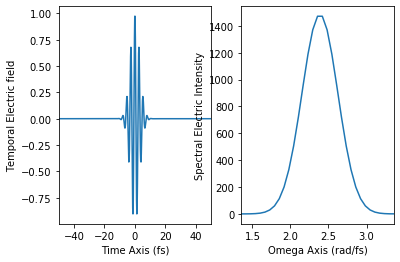

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt

Npts = 2**9
time_window = 100 #in fs
omega_axis, time_axis = ftAxis_time(Npts, time_window)  #in rad/fs, fs

lambda0 = 800
omega0 = l2w(800)
t0 = 0  #fs
dt = 5  #fs
Et = gauss1D(time_axis, 0, dt) * np.exp(1j*omega0*time_axis)
Ew = ft(Et)

plt.subplot(121)
plt.plot(time_axis, np.real(Et))
plt.xlabel('Time Axis (fs)')
plt.ylabel('Temporal Electric field')
plt.xlim([-50, 50])

plt.subplot(122)
plt.plot(omega_axis, np.abs(Ew)**2)
plt.xlabel('Omega Axis (rad/fs)')
plt.ylabel('Spectral Electric Intensity')
plt.xlim([omega0-1, omega0+1])


In [46]:
import plotly.graph_objects as go
from ipywidgets import widgets

def get_delayed_field(t0=0):
    return gauss1D(time_axis, t0, dt) * np.exp(1j*omega0*time_axis)

t0_select = widgets.FloatSlider(value=0.0,
                        min=-10.,
                        max=10.,
                        step=0.1,
                        description='t0:',
                        continuous_update=True)

container = widgets.HBox(children=[t0_select])

data=go.Scatter(x=time_axis, y=np.real(Et), mode='lines',)
data1=go.Scatter(x=time_axis, y=np.abs(Et), mode='lines', line=dict(color='red'))

g = go.FigureWidget(data=[data, data1],)
g.update_xaxes(range=(-50,50))

def validate():
    return True

def response(change):
    if validate():
        if t0_select.value:
            with g.batch_update():
                g.data[0].x = time_axis
                g.data[0].y = np.real(get_delayed_field(t0_select.value))
                g.data[1].x = time_axis
                g.data[1].y = np.abs(get_delayed_field(t0_select.value))
t0_select.observe(response, names="value")
widgets.VBox([container, g])

## From Spectral domain

0.5890486225480862


(-50, 50)

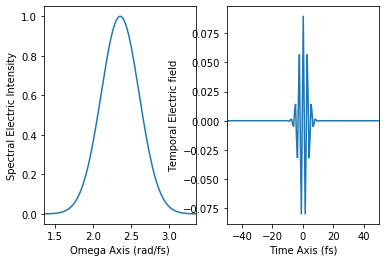

In [63]:

Npts = 2**9

lambda0 = 800
omega0 = l2w(800)

omega_max = 2.1*omega0 #in fs
omega_axis, time_axis = ftAxis(Npts, omega_max)  #in rad/fs, fs
dlambda = 200
dw = 2*pi*c*dlambda/lambda0**2
print(dw)
Ew = gauss1D(omega_axis, omega0, dw)
Et = ift(Ew)

plt.subplot(121)
plt.plot(omega_axis, np.abs(Ew)**2)
plt.xlabel('Omega Axis (rad/fs)')
plt.ylabel('Spectral Electric Intensity')
plt.xlim([omega0-1, omega0+1])

plt.subplot(122)
plt.plot(time_axis, np.real(Et))
plt.xlabel('Time Axis (fs)')
plt.ylabel('Temporal Electric field')
plt.xlim([-50, 50])

In [84]:
import plotly.graph_objects as go
from ipywidgets import widgets

Npts = 2**12
omega_max = 5*2.32 #in rad/fs
omega_axis, time_axis = ftAxis(Npts, omega_max)  #in rad/fs, fs

def get_temporal_field(lambda0=800, dlambda=100, phi2=0, phi3=0):
    omega0 = l2w(lambda0)
    dw = 2*pi*c*dlambda/lambda0**2
    Ew = gauss1D(omega_axis, omega0, dw) * np.exp(1j*phi2/2*(omega_axis-omega0)**2+
                                                 1j*phi3/6*(omega_axis-omega0)**3)
    return ift(Ew)


lambda0_select = widgets.FloatSlider(value=800.0,
                        min=400.,
                        max=2000.,
                        step=10,
                        description='lambda0:',
                        continuous_update=False)
dlambda_select = widgets.FloatSlider(value=100.0,
                        min=10.,
                        max=300.,
                        step=10,
                        description='dlambda:',
                        continuous_update=True)

phi2_select = widgets.FloatSlider(value=0.0,
                        min=-500.,
                        max=500.,
                        step=1,
                        description='phi2:',
                        continuous_update=True)

phi3_select = widgets.FloatSlider(value=0.0,
                        min=-3000.,
                        max=3000.,
                        step=10,
                        description='phi3:',
                        continuous_update=True)

container = widgets.HBox(children=[lambda0_select, dlambda_select])
container2 = widgets.HBox(children=[phi2_select, phi3_select])


data=go.Scatter(x=time_axis, y=np.real(get_temporal_field(800, 100,0)), mode='lines',)
data1=go.Scatter(x=time_axis, y=np.abs(get_temporal_field(800, 100,0)), mode='lines', line=dict(color='red'))

g = go.FigureWidget(data=[data, data1],)
g.update_xaxes(range=(-100,100))

def validate():
    return True

def response(change):
    if validate():
        if t0_select.value:
            with g.batch_update():
                g.data[0].y = np.real(get_temporal_field(lambda0_select.value, dlambda_select.value,
                                                        phi2_select.value, phi3_select.value))
                g.data[1].y = np.abs(get_temporal_field(lambda0_select.value, dlambda_select.value,
                                                        phi2_select.value, phi3_select.value))
lambda0_select.observe(response, names="value")
dlambda_select.observe(response, names="value")
phi2_select.observe(response, names="value")
phi3_select.observe(response, names="value")
widgets.VBox([container, container2, g])